In [1]:
import matplotlib.pyplot as plt; 
import numpy as np; import pylab; 
import os; 
import pandas as pd
import plotly.plotly as py;
import plotly.tools as tls
from statsmodels import robust
import seaborn as sns; # Seaborn box plot for statistical annotation - * pvalue

In [2]:
# Read in data
def parse_data_CDC(file, cancer_type, metric_index):
    
    filename = os.path.join("Originals", file)
    
    data = []; cancer=[];metric=[];year=[];
    all_races=[]; caucasian=[];african_american=[];asian=[];hispanic=[];native_american=[];
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5,x6,x7,x8,x9 = data[i].split(",")  
        
        if x1 == cancer_type:
            if x2 == metric_index:
                year.append(int(x3)) 
                all_races.append(int(x4))
                
                year_sum = int(x5)+int(x6)+int(x7)+int(x8)+int(x9)
                
                caucasian.append(int(x5)/year_sum)
                african_american.append(int(x6)/year_sum)
                asian.append(int(x7)/year_sum) 
                hispanic.append(int(x8)/year_sum) 
                native_american.append(int(x9)/year_sum) 
    
    return(year, caucasian, african_american, asian, hispanic, native_american)

In [ ]:
def stacked_bar_CDC(title, source_filename, cancer_type, measurement_type):
    
    year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
    year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC(source_filename, cancer_type, measurement_type)

    plt.bar(year,caucasian, color=[.9, .7, .7], width=1)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i]
        bar_offset.append(number)

    plt.bar(year,african_american, color=[.7, .9, .7], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i]
        bar_offset.append(number)

    plt.bar(year, asian, color=[.7, .7, .9], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i] + asian[i]
        bar_offset.append(number)

    plt.bar(year, hispanic, color=[.9, .7, .9], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i] + asian[i] + hispanic[i]
        bar_offset.append(number)

    plt.bar(year, native_american, color=[.9, .9, .7], width=1, bottom=bar_offset)
    
    plt.title(title)
    plt.xlabel('Year'); 
    plt.ylabel('Volume Fraction'); 
    plt.ylim((.7,1.01))

    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()
    

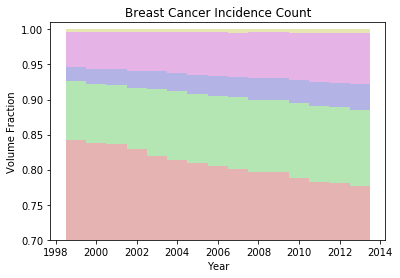

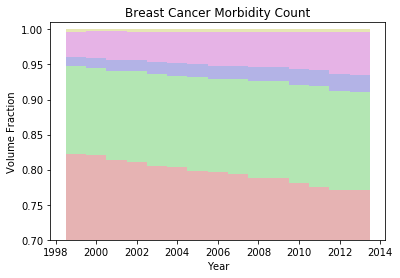

In [ ]:

stacked_bar_CDC("Breast Cancer Incidence Count", "v01_CDC.csv","2","3")
stacked_bar_CDC("Breast Cancer Morbidity Count", "v01_CDC.csv","2","4")

stacked_bar_CDC("Prostate Cancer Incidence Count", "v01_CDC.csv","3","3")
stacked_bar_CDC("Prostate Cancer Morbidity Count", "v01_CDC.csv","3","4")

stacked_bar_CDC("Lung Cancer Incidence Count", "v01_CDC.csv","4","3")
stacked_bar_CDC("Lung Cancer Morbidity Count", "v01_CDC.csv","4","4")


In [ ]:
def parse_data_count(file, cancer_type, year_min, year_max):
    
    filename = os.path.join("Originals", file)
     
    data = []  
    caucasian = []; african_american = []; asian =[]; hispanic =[]; native_american = []; unknown = [];
    year_caucasian = []; year_african_american = []; year_asian = []; year_hispanic = []; year_native_american = []; year_unknown = [];
    count_caucasian = 0; count_african_american = 0; count_asian = 0; count_hispanic = 0; count_native_american = 0; count_unknown = 0; 
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",") 
        
        count_caucasian
        
        if x3 == cancer_type: 
            
            x2 = int(x2)
            x4 = int(x4)
            x5 = int(x5)
            
            if x2 == 6:
                unknown.append(x5)
                year_unknown.append(x4)
                count_unknown = count_unknown + x5
                
            if x2 == 5:
                caucasian.append(x5)
                year_caucasian.append(x4)
                count_caucasian = count_caucasian + x5
        
            if x2 == 2:
                african_american.append(x5)
                year_african_american.append(int(x4))
                count_african_american = count_african_american + x5
            
            if x2 == 1:
                asian.append(x5)
                year_asian.append(x4)
                count_asian = count_asian + x5
             
            if x2 == 3:
                hispanic.append(x5)
                year_hispanic.append(x4)
                count_hispanic = count_hispanic + x5
                         
            if x2 == 4:
                native_american.append(x5)
                year_native_american.append(x4) 
                count_native_american = count_native_american + x5
                
    print("Caucasian Counts = ", count_caucasian)
    print("African American Counts = ", count_african_american)
    print("Asian Counts = ", count_asian)
    print("Hispanic Counts = ", count_hispanic)
    print("Native American Counts = ", count_native_american)
    print("Unknown Counts = ", count_unknown)
    print("Total = ", count_caucasian + count_african_american + count_asian + count_hispanic + count_native_american)

    return(caucasian, year_caucasian, african_american, year_african_american, asian, year_asian, \
           hispanic, year_hispanic, native_american, year_native_american)


In [ ]:
def parse_counts(source_filename, cancer_type, year_min, year_max, title):

    caucasian, year_caucasian, african_american, year_african_american, asian, year_asian, \
    hispanic, year_hispanic, native_american, year_native_american \
    = parse_data_count(source_filename, cancer_type, year_min, year_max)

    plt.bar(year_caucasian, caucasian, color=[.9, .7, .7], width=.8, label = 'Caucasian')
    plt.bar(year_african_american, african_american, color=[.7, .9, .7], width=.7, label = 'Caucasian')
    plt.bar(year_asian, asian, color=[.7, .7, .9], width=.6, label = 'Caucasian')
    plt.bar(year_hispanic, hispanic, color=[.9, .7, .9], width=.5, label = 'Caucasian')
    plt.bar(year_native_american, native_american, color=[.9, .7, .9], width=.4, label = 'Caucasian')

    plt.title(title)
    plt.xlabel('Year'); 
    plt.ylabel('Volume Fraction'); 
    plt.xlim((year_min, year_max));
    
    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()


In [ ]:
parse_counts("v01_PaCo.csv", "1", 2000, 2018, "Patent Counts for All Cancer Types")
parse_counts("v01_PuCo.csv", "1", 2000, 2018, "Publication Counts for All Cancer Types")
parse_counts("v01_PaCo.csv", "2", 2000, 2018, "Patent Counts for Breast Cancer")
parse_counts("v01_PuCo.csv", "2", 2000, 2018, "Publication Counts for Breast Cancer")
parse_counts("v01_PaCo.csv", "3", 2000, 2018, "Patent Counts for Prostate Cancer")
parse_counts("v01_PuCo.csv", "3", 2000, 2018, "Publication Counts for Prostate Cancer")
parse_counts("v01_PaCo.csv", "4", 2000, 2018, "Patent Counts for Lung Cancer")
parse_counts("v01_PuCo.csv", "4", 2000, 2018, "Publication Counts for Lung Cancer")


In [ ]:
def parse_data_count(source_filename, cancer_type, unknown_included):
    
    filename = os.path.join("Originals", source_filename)
     
    data = []  
    caucasian = []; african_american = []; asian =[]; hispanic =[]; native_american = []; unknown = [];
    year_caucasian = []; year_african_american = []; year_asian = []; year_hispanic = []; year_native_american = []; year_unknown = [];
    count_caucasian = 0; count_african_american = 0; count_asian = 0; count_hispanic = 0; count_native_american = 0; count_unknown = 0; count_all = 0; 
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()  
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5,x6,x7 = data[i].split(",") 
        
        if x4 == '0':
            if cancer_type == "all":
                x1 = cancer_type
            
            if x1 == cancer_type: 
                
                if unknown_included == 'yes':
                    if x3 == '6':
                        count_unknown = count_unknown + 1
                        count_all = count_all+1
                
                if x3 == '5':
                    count_caucasian = count_caucasian + 1
                    count_all = count_all+1
        
                if x3 == '2':
                    count_african_american = count_african_american + 1
                    count_all = count_all+1
            
                if x3 == '1':
                    count_asian = count_asian + 1
                    count_all = count_all+1
             
                if x3 == '3':
                    count_hispanic = count_hispanic + 1
                    count_all = count_all+1
                         
                if x3 == '4':
                    count_native_american = count_native_american + 1
                    count_all = count_all+1
    
    total = [count_asian, count_african_american, count_hispanic, count_native_american, count_caucasian, count_unknown]
    total_percentages = [count_asian/count_all, count_african_american/count_all, count_hispanic/count_all, count_native_american/count_all, count_caucasian/count_all, count_unknown/count_all ]
    
    print(" ")
    print("Caucasian Counts = ", count_caucasian, '   ', round(count_caucasian/count_all,2))
    print("African American Counts = ", count_african_american, '   ', round(count_african_american/count_all,2))
    print("Asian Counts = ", count_asian, '   ', round(count_asian/count_all,2))
    print("Hispanic Counts = ", count_hispanic, '   ', round(count_hispanic/count_all,2))
    print("Native American Counts = ", count_native_american, '   ', round(count_native_american/count_all,2))
    print("Unknown Counts = ", count_unknown, '   ', round(count_unknown/count_all,2))
    print("Total = ", count_all,'(without unknowns:', count_all-count_unknown, ')')
    
    return(total, total_percentages)   


In [ ]:
def parse_cell_line_counts(source_filename, cancer_type, year_min, year_max, title):
    
    ethnicity_list = ["Asian","African American","Hispanic","Native American", "Caucasian","Unknown"]
    
    fig = plt.figure(2, figsize=(18, 10)); 
    
    plot_number = 221;
    ax = fig.add_subplot(plot_number);
    total, total_percentages = parse_data_count(source_filename, cancer_type, 'yes')
    plt.bar(ethnicity_list,total)
    plt.title(title)
    plt.ylabel('Number of Cell Lines'); 
    
    plot_number = 222;
    ax = fig.add_subplot(plot_number);
    total, total_percentages = parse_data_count(source_filename, cancer_type, 'no')
    plt.bar(ethnicity_list[0:5],total[0:5])
    plt.title(title)
    plt.ylabel('Number of Cell Lines'); 
    
    saved_filename = os.path.join("Figures", title +'.jpg')
    plt.savefig(saved_filename, bbox_inches='tight')
    plt.show()

In [ ]:
parse_cell_line_counts("v01_CellLineSum_withoutLabels.csv", '2', 2001, 2018, 'Breast Cancer Cell Line Sums')
parse_cell_line_counts("v01_CellLineSum_withoutLabels.csv", '3', 2001, 2018, 'Prostate Cancer Cell Line Sums')
parse_cell_line_counts("v01_CellLineSum_withoutLabels.csv", '4', 2001, 2018, 'Lung Cancer Cell Line Sums')
parse_cell_line_counts("v01_CellLineSum_withoutLabels.csv", 'all', 2001, 2018, 'All Cell Line Sums')
